# Digit Classification using Naive Bayes, Random Forest and SVM 
###                                                                                                      - Yash Pasar

#### This project deals with predicting handwritten digits by building classifiers using Naive Bayes, K-Nearest Neighbor and Support Vector Machine algorithms. The dataset has class label from 0-9 and feature set of pixel values for the handwritten digits. Our aim is to build a classifier using the pixel values to predict the label for the digit

### Importing all the necessary packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
import os
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import time
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Reading Sample Train data and Test data

In [2]:
train_data = pd.read_csv('/Users/yashpasar/Downloads/Kaggle-digit-train-sample-small-1400.csv')
test_data = pd.read_csv('/Users/yashpasar/Downloads/Kaggle-digit-test-sample1000.csv')

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Check for null values

In [5]:
print('Columns with null values:' ,sum(list(train_data.isnull().any())))
print('Columns with null values:' ,sum(list(test_data.isnull().any())))

Columns with null values: 0
Columns with null values: 784


### Removing null values from the test data

In [6]:
test_data = test_data.fillna(0)

### Splitting data into Train and Test

In [7]:
X_train = train_data.drop('label', axis=1)
y_train = train_data.label
X_test = test_data.drop('label', axis=1)
y_test = test_data.label
label = sorted(y_train.unique())

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1400, 784) (1400,)
(1000, 784) (1000,)


### Visualizing the data to be classified

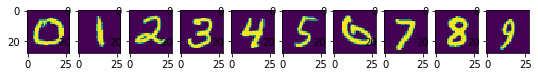

In [9]:
plt.figure(figsize=(9,9))
for i in label:
    plt.subplot(1,10, i+1)
    img = np.array( X_train[y_train==i][1:2] ).reshape(28,28)
    plt.imshow(img)

## Naive Bayes Gaussian Model

In [10]:
gnb = GaussianNB()
scores = cross_val_score(gnb, X_train, y_train, cv=5)
print(f"Accuracy: {100*scores.mean()}%")

Accuracy: 59.58181708645428%


In [11]:
gnb.fit(X_train, y_train)
gnb.predict(X_test)

array([2, 0, 9, 9, 6, 7, 0, 3, 0, 3, 8, 7, 4, 0, 9, 0, 3, 1, 9, 0, 9, 1,
       8, 8, 9, 9, 2, 7, 9, 9, 7, 8, 4, 8, 6, 2, 9, 8, 8, 6, 9, 7, 4, 9,
       8, 3, 1, 8, 1, 7, 6, 8, 1, 3, 8, 6, 1, 8, 6, 0, 9, 1, 7, 0, 0, 0,
       1, 9, 0, 1, 6, 8, 8, 8, 8, 8, 4, 9, 6, 3, 8, 9, 1, 0, 9, 6, 4, 3,
       6, 9, 2, 0, 6, 6, 5, 9, 3, 5, 7, 9, 0, 1, 8, 0, 9, 8, 0, 8, 0, 4,
       6, 0, 8, 8, 1, 3, 1, 1, 8, 8, 3, 9, 3, 1, 6, 3, 8, 9, 8, 9, 3, 8,
       6, 4, 0, 0, 3, 1, 0, 6, 0, 3, 4, 5, 8, 8, 9, 7, 3, 1, 5, 6, 8, 6,
       8, 8, 7, 8, 7, 8, 3, 0, 4, 3, 1, 1, 9, 6, 3, 0, 6, 9, 9, 6, 1, 3,
       7, 5, 1, 8, 4, 9, 8, 6, 4, 9, 6, 1, 6, 0, 2, 8, 4, 5, 6, 0, 9, 9,
       8, 9, 1, 9, 0, 9, 9, 0, 8, 4, 6, 6, 0, 9, 3, 6, 9, 8, 1, 6, 3, 9,
       2, 3, 1, 2, 8, 8, 9, 6, 1, 0, 0, 8, 9, 1, 7, 8, 2, 8, 9, 6, 8, 6,
       2, 8, 8, 8, 9, 8, 8, 9, 9, 9, 1, 7, 8, 4, 1, 1, 4, 0, 6, 2, 8, 5,
       7, 0, 6, 8, 2, 1, 6, 0, 6, 3, 8, 8, 1, 9, 8, 4, 0, 7, 2, 4, 8, 9,
       9, 9, 9, 9, 8, 9, 9, 7, 9, 6, 8, 8, 0, 3, 2,

## Support Vector Machine Model

### Preprocessing the data for SVM be applying the Standard Scaler function

In [12]:
scaler = StandardScaler()  
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)  
X_test_std = scaler.transform(X_test)

In [13]:
clf = svm.SVC()
scores = cross_val_score(clf, X_train_std, y_train, cv=5)
print(f"Accuracy: {100*scores.mean()}%")

Accuracy: 88.21025361823644%


### Parameter Tuning for SVM Model

In [14]:
param_grid = {'kernel' : ['rbf', 'linear'],
             'gamma' : [1, 0.1, 0.01, 0.001],
              'C' : [0.25,0.5,0.75,1]}
grid = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train_std, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.25, 0.5, 0.75, 1],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [15]:
C=grid.best_params_['C']
kernel = grid.best_params_['kernel']
gamma=grid.best_params_['gamma']
clf=svm.SVC(kernel=kernel, C=C,gamma=gamma, random_state=42)

In [16]:
scores = cross_val_score(clf, X_train_std, y_train, cv=5)
print(f"Accuracy: {100*scores.mean()}%")

Accuracy: 87.57036538013206%


In [17]:
clf.fit(X_train_std, y_train)
clf.predict(X_test_std)

array([2, 0, 9, 7, 2, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1,
       1, 5, 7, 4, 2, 7, 7, 7, 7, 5, 4, 2, 6, 2, 9, 5, 1, 6, 7, 7, 4, 9,
       8, 3, 8, 8, 6, 1, 6, 8, 8, 3, 8, 2, 1, 2, 7, 0, 4, 1, 7, 0, 0, 0,
       1, 9, 0, 1, 6, 5, 8, 8, 2, 8, 3, 9, 2, 3, 5, 9, 1, 0, 9, 2, 4, 3,
       6, 7, 2, 0, 6, 6, 1, 4, 3, 9, 7, 4, 0, 3, 8, 0, 7, 3, 0, 5, 0, 4,
       6, 0, 4, 1, 1, 7, 1, 1, 5, 3, 3, 7, 3, 8, 6, 3, 8, 7, 7, 4, 3, 5,
       6, 0, 0, 0, 3, 1, 3, 6, 4, 3, 4, 5, 5, 8, 7, 7, 2, 8, 7, 3, 5, 6,
       5, 1, 7, 5, 7, 8, 3, 0, 4, 5, 1, 8, 7, 6, 3, 0, 2, 7, 9, 6, 1, 3,
       7, 4, 1, 2, 4, 8, 5, 2, 4, 9, 2, 1, 6, 0, 2, 1, 4, 2, 6, 0, 9, 7,
       6, 9, 1, 9, 0, 9, 9, 0, 8, 4, 6, 2, 0, 9, 3, 6, 7, 2, 1, 6, 3, 4,
       2, 3, 1, 0, 2, 0, 4, 6, 1, 0, 0, 4, 9, 1, 7, 3, 2, 8, 8, 6, 8, 6,
       2, 8, 5, 5, 4, 8, 3, 8, 9, 4, 1, 3, 8, 4, 5, 1, 4, 3, 6, 3, 3, 5,
       7, 0, 6, 8, 6, 1, 6, 0, 6, 3, 9, 4, 1, 5, 8, 4, 0, 9, 2, 0, 5, 3,
       7, 1, 9, 9, 5, 7, 7, 9, 9, 6, 3, 0, 3, 3, 6,

## Random Forest Model

In [18]:
model = RandomForestClassifier()
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Accuracy: {100*scores.mean()}%")

Accuracy: 81.49925092689563%


### Parameter Tuning for Random Forest Model

In [19]:
param_grid = {'n_estimators' : [25,50,75,100,300]}
grid = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [20]:
n_estimators=grid.best_params_['n_estimators']
model = RandomForestClassifier(n_estimators=n_estimators, min_samples_split=2, min_samples_leaf=1)
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Accuracy: {100*scores.mean()}%")


Accuracy: 91.05498425387424%


In [21]:
model.fit(X_train, y_train)
model.predict(X_test)

array([2, 0, 9, 4, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1,
       1, 5, 7, 4, 2, 7, 7, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9,
       8, 7, 8, 8, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 9, 5, 4, 1, 7, 0, 0, 0,
       1, 9, 0, 1, 6, 5, 8, 8, 2, 8, 3, 9, 2, 3, 5, 9, 1, 0, 9, 2, 4, 3,
       6, 7, 2, 0, 6, 6, 1, 4, 3, 8, 7, 4, 0, 3, 2, 0, 7, 9, 0, 5, 0, 3,
       0, 0, 4, 7, 1, 2, 1, 1, 5, 3, 3, 7, 2, 8, 6, 3, 8, 7, 8, 4, 3, 5,
       6, 0, 0, 0, 3, 1, 3, 0, 4, 3, 4, 5, 5, 8, 7, 7, 2, 8, 4, 3, 5, 6,
       5, 1, 7, 5, 7, 8, 3, 0, 4, 5, 1, 8, 7, 6, 3, 0, 2, 7, 9, 6, 1, 3,
       7, 4, 1, 2, 4, 8, 5, 2, 4, 9, 2, 1, 6, 0, 6, 1, 4, 9, 6, 0, 9, 7,
       6, 9, 1, 9, 0, 9, 9, 0, 8, 4, 6, 2, 0, 9, 3, 6, 7, 2, 1, 6, 3, 4,
       2, 3, 1, 5, 2, 0, 9, 6, 1, 0, 0, 4, 9, 1, 7, 3, 2, 3, 8, 6, 8, 6,
       2, 8, 5, 5, 9, 8, 3, 6, 9, 7, 1, 3, 8, 4, 5, 1, 4, 3, 6, 3, 3, 5,
       7, 0, 6, 8, 6, 1, 6, 0, 6, 3, 8, 9, 1, 5, 8, 4, 0, 9, 2, 0, 5, 3,
       7, 1, 9, 9, 5, 7, 7, 9, 9, 6, 3, 0, 3, 3, 6,

## Boxplots showing the spread of the accuracy scores across each cross validation fold for each algorithm.

In [28]:
models=[]
time_taken=[]
models.append(('NB', gnb))
models.append(('SVM', clf))
models.append(('RF', model))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    if models == 'NB' or models == 'RF':
        start = time.time()
        cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring=scoring)
        end = time.time()
        time_taken = end - start
    else:
        start = time.time()
        cv_results = cross_val_score(model, X_train_std, y_train, cv=5, scoring=scoring)
        end = time.time()
        time_taken = end - start    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f, %f" % (name, (cv_results.mean()*100),time_taken)
    print(msg)

NB: 58.798563, 0.309288
SVM: 87.570365, 6.136736
RF: 90.988143, 8.085012


## Boxplot algorithm comparison

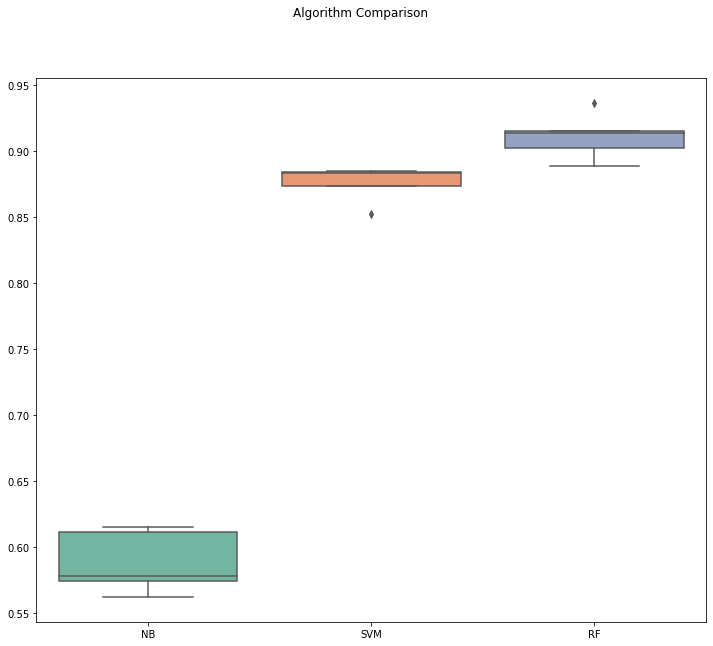

In [26]:
fig = plt.figure(figsize=(12, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=results, palette="Set2")
ax.set_xticklabels(names)
plt.show()

## Takeaway:
### - As seen from the above comparison, it is clear that implementing Random Forest gives us the best accuracy (91.12%) among all 3 models. While it provides us with the best accuracy, it also consumes the most time (6.76 secs). The reason being that it has the most number of parameters to be tuned. 
### - SVM takes 5.96 secs and produces results with 87.57% of accuracy. It took lesser time than Random Forest becuase it has less parameters to be tuned.
### -Naive Bayes takes the least amount of the time to run but it also provides us with a low accuracy rate. It works on the assumption of independence of variables. When the assumption is violated, it might not perform well. This might be reason that Naive Bayes performance in this problem is poor if compared to Random Forest Classifier and SVM.
### -It is also seen that naive bayes model overfits the data as the variance in the cross validation accuracies is large for naive bayes.